In [1]:
import numpy as np
import pandas as pd

from apyori import apriori

import seaborn as sns

In [2]:
df=pd.read_csv('./../P8_store_data.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(7501, 20)

In [5]:
data=[]

for i in range(7501):
    data.append([str(df.values[i,j]) for j in range(20) if pd.isnull(df.values[i,j])==False])

In [6]:
data

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [7]:
a_rules=apriori(data,min_support=0.01,min_confidence=0.02,min_lift=2,min_length=3)

In [8]:
result=list(a_rules)

In [9]:
len(result)

20

In [10]:
result[0][0]

frozenset({'frozen vegetables', 'shrimp'})

In [11]:
l1=[]
l2=[]

for item in result:
    shopping_pair=list(item[0])
    print('Rule: ',shopping_pair[0],'-->',shopping_pair[1:])
    l1.append(item[1])
    print('Support: ',item[1])
    l2.append(item[2][0][2])
    print('Confidence: ',item[2][0][2])
    print('Lift: ',item[2][0][3])
    print('________________________________________')

Rule:  shrimp --> ['frozen vegetables']
Support:  0.01666444474070124
Confidence:  0.17482517482517482
Lift:  2.4465739484396196
________________________________________
Rule:  tomatoes --> ['frozen vegetables']
Support:  0.0161311825089988
Confidence:  0.1692307692307692
Lift:  2.4744639376218323
________________________________________
Rule:  grated cheese --> ['ground beef']
Support:  0.011331822423676844
Confidence:  0.2162849872773537
Lift:  2.201294015695292
________________________________________
Rule:  herb & pepper --> ['ground beef']
Support:  0.015997866951073192
Confidence:  0.1628222523744912
Lift:  3.291993841134928
________________________________________
Rule:  olive oil --> ['ground beef']
Support:  0.014131449140114652
Confidence:  0.14382632293080055
Lift:  2.183889166607156
________________________________________
Rule:  spaghetti --> ['ground beef']
Support:  0.03919477403012932
Confidence:  0.3989145183175034
Lift:  2.291162176033379
_____________________________

In [12]:
df_n=pd.DataFrame({'Support':l1,'Confidence':l2})

<AxesSubplot:xlabel='Support', ylabel='Confidence'>

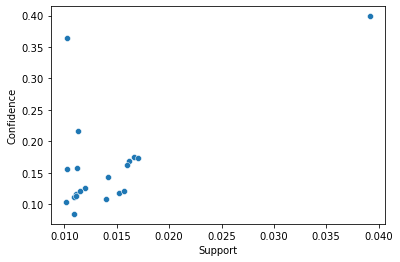

In [13]:
sns.scatterplot(x='Support',y='Confidence',data=df_n)

<AxesSubplot:xlabel='Support', ylabel='Confidence'>

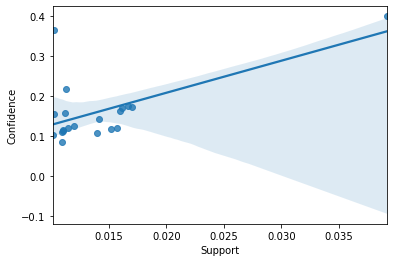

In [14]:
sns.regplot(x='Support',y='Confidence',data=df_n)

In [39]:
from mlxtend.frequent_patterns import apriori as ap,association_rules

In [40]:
df1=pd.read_csv('BankChurners.csv')

In [41]:
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le=LabelEncoder()

In [44]:
df1['Attrition_Flag']=le.fit_transform(df1['Attrition_Flag'])
d1=dict(zip(le.classes_,le.transform(le.classes_)))
print(d1)

{'Attrited Customer': 0, 'Existing Customer': 1}


In [45]:
df1['Gender']=le.fit_transform(df1['Gender'])
d2=dict(zip(le.classes_,le.transform(le.classes_)))
print(d2)

{'F': 0, 'M': 1}


In [46]:
df1['Marital_Status']=le.fit_transform(df1['Marital_Status'])
d3=dict(zip(le.classes_,le.transform(le.classes_)))
print(d3)

{'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}


In [47]:
df1['Card_Category']=le.fit_transform(df1['Card_Category'])
d4=dict(zip(le.classes_,le.transform(le.classes_)))
print(d4)

{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}


In [49]:
df1_0=df1[df1['Attrition_Flag']==0]
df1_1=df1[df1['Attrition_Flag']==1]

In [61]:
frq_items = apriori(df1_0, min_support = 0.05) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
type(rules)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

AttributeError: 'generator' object has no attribute 'columns'

In [58]:
rules=association_rules(freq_items,metric='lift',min_threshold=1)

AttributeError: 'generator' object has no attribute 'columns'